This is needed to reload modules without restarting the kernel

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This is needed to add eda_tools from the directories above

In [41]:
import os
os.sys.path.append('../../')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Analyse the Chi2 metric for reweighting

Lets analyse the use of the chi2 metric to evaluate the reweighting in the different regions and with different features

In [86]:
def weighted_chisquare(f_obs, f_exp, f_obs_err, f_exp_err, ignore_stats = False, residuals=False, stat_lim = 10):
    #obs = 2b
    #exp = 4b
    
    from scipy.stats import chi2
    
    
    #Calculate weighted chi-square using method in arXiv:physics/0605123
    if ignore_stats == False:
        w1 = f_obs[(f_obs > stat_lim) | (f_exp > stat_lim)]
        w2 = f_exp[(f_obs > stat_lim) | (f_exp > stat_lim)]
        s1 = f_obs_err[(f_obs > stat_lim) | (f_exp > stat_lim)]  # noqa
        s2 = f_exp_err[(f_obs > stat_lim) | (f_exp > stat_lim)]  # noqa
    else:
        w1 = f_obs
        w2 = f_exp
        s1 = f_obs_err # noqa
        s2 = f_exp_err # noqa
    
    ndf = len(w1) - 1
    W1 = np.sum(w1)  # noqa
    W2 = np.sum(w2)  # noqa

    pi = (w1*W1 / (s1**2)) + (w2*W2/ (s2**2)) / (((W1**2)/(s1**2)) + ((W2**2)/(s2**2)))


    R = (W1*w2 - W2*w1)**2 / (W1**2 * s2**2 + W2**2 * s1**2)
    R = np.where(((np.isnan(R)) | (np.isinf(R))), 0, R)
    #X2 = np.sum((W1*w2 - W2*w1)**2 / (W1**2 * s2**2 + W2**2 * s1**2))
    X2 = np.sum(R)
    p_value = chi2.sf(X2, ndf)
    if residuals:
        frac = 1 + ((W2**2)*(s1**2))/((W1**2)/(s2**2))
        top = w1-W1*pi
        bottom = s1 * np.sqrt(1 - 1/frac)
        ri = top/bottom
        return (X2, p_value, ndf, X2/ndf, ri)
    else:
        return (X2, p_value, ndf, X2/ndf)

# Loading example data

In [326]:
storage = '/mnt/storage/lborgna/NNT/MDR_VEC/data/'

In [327]:
fbp16 = storage + 'data_MDR_VEC_16_NN_100_bootstraps.root'
fbp17 = storage + 'data_MDR_VEC_17_NN_100_bootstraps.root'
fbp18 = storage + 'data_MDR_VEC_18_NN_100_bootstraps.root'

In [328]:
fdb16 = uproot.open(fbp16)
fdb17 = uproot.open(fbp17)
fdb18 = uproot.open(fbp18)

In [7]:
from hh4b_utils.nnt_tools import load_nnt

In [429]:
help(load_nnt)

Help on function load_nnt in module hh4b_utils.nnt_tools:

load_nnt(file_path:str, trees:list=['control', 'validation', 'sig']) -> pandas.core.frame.DataFrame
    loads all the trees in the NNT into a single dataframe
    Note: This will not work with the triggerList tree.



In [9]:
d16 = load_nnt(fbp16)

In [329]:
d17 = load_nnt(fbp17)
d18 = load_nnt(fbp18)

In [11]:
d16

run_number  event_number  pass_vbf_sel  mc_sf  trig_sf  jet_trig_sfs  \
0            298773        808585         False    1.0      1.0           1.0   
1            298773       1798465         False    1.0      1.0           1.0   
2            298773       1855518         False    1.0      1.0           1.0   
3            298773       1671576         False    1.0      1.0           1.0   
4            298773       1711116         False    1.0      1.0           1.0   
...             ...           ...           ...    ...      ...           ...   
2031625      310872    2048650141         False    1.0      1.0           1.0   
2031626      310872    2048613299         False    1.0      1.0           1.0   
2031627      310872    2050990889         False    1.0      1.0           1.0   
2031628      310872    2050304167         False    1.0      1.0           1.0   
2031629      310872    2050661806         False    1.0      1.0           1.0   

         truth_mhh  ntag  njets  kinematic_region  ...  vbf_dEtajj  \
0              0.0     2      4                 2  ...     0.00000   
1              0.0     2      4                 2  ...     0.00000   
2              0.0     2      4                 2  ...     0.00000   
3              0.0     2      4                 2  ...     0.00000   
4              0.0     2      5                 2  ...     3.87662   
...            ...   ...    ...               ...  ...         ...   
2031625        0.0     2      4                 0  ...     0.00000   
2031626        0.0     2      4                 0  ...     0.00000   
2031627        0.0     2      4                 0  ...     0.00000   
2031628        0.0     2      4                 0  ...     0.00000   
2031629        0.0     2      4                 0  ...     0.00000   

         vbf_pTvecsum  NN_d24_weight_bstrap_med_16  \
0            0.000000                     0.007541   
1            0.000000                     0.001987   
2            0.000000                     0.007111   
3            0.000000                     0.002745   
4           91.482934                     0.101927   
...               ...                          ...   
2031625      0.000000                     0.011602   
2031626      0.000000                     0.005192   
2031627      0.000000                     0.004447   
2031628      0.000000                     0.001423   
2031629      0.000000                     0.003352   

         NN_d24_weight_bstrap_perc_25_16  NN_d24_weight_bstrap_perc_75_16  \
0                               0.006265                         0.008914   
1                               0.001561                         0.002580   
2                               0.004749                         0.012265   
3                               0.002250                         0.003162   
4                               0.059182                         0.137311   
...                                  ...                              ...   
2031625                         0.009466                         0.014704   
2031626                         0.003865                         0.006271   
2031627                         0.003625                         0.006179   
2031628                         0.001091                         0.001764   
2031629                         0.002729                         0.004174   

         NN_d24_weight_bstrap_IQR_16  NN_d24_weight_VRderiv_bstrap_med_16  \
0                           0.002650                             0.008675   
1                           0.001019                             0.001860   
2                           0.007516                             0.021026   
3                           0.000912                             0.004735   
4                           0.078129                             0.135429   
...                              ...                                  ...   
2031625                     0.005238                             0.009896   
20316

In [17]:
d16.filter(regex='NN_d24_weight_bstrap_med').columns.to_list()[0]

'NN_d24_weight_bstrap_med_16'

In [46]:
from eda_tools.bkg_helper import bs_error

In [12]:
from eda_tools.utilities import getNorm

In [133]:
def make_histograms(
    df: pd.DataFrame,
    kr: int = 2,
    feature: str = "m_hh",
    bins=50,
    hrange=(200, 1200),
    weights_column: str = None,
    W_IQR: str = None,
    mu_iqr = None
):
    mask_kr = df["kinematic_region"] == kr
    mask_4b = df["ntag"] >= 4
    mask_2b = df["ntag"] == 2

    if weights_column is None:
        weights_column = df.filter(regex="NN_d24_weight_bstrap_med").columns.to_list()[
            0
        ]

    mu = getNorm(df, k=kr, weight_column=weights_column)

    results = {}

    h_4b, be = np.histogram(
        df.loc[mask_4b & mask_kr, feature].values, bins=bins, range=hrange
    )

    results["h_4b"] = h_4b
    results["h_4b_err"] = np.sqrt(h_4b)
    results["be"] = be

    h_2b, _ = np.histogram(
        df.loc[mask_2b & mask_kr, feature].values,
        bins=be,
        weights=mu * df.loc[mask_2b & mask_kr, weights_column].values,
    )
    results['h_2b'] = h_2b

    h_2b_pois = np.sqrt(
        np.histogram(
            df.loc[mask_2b & mask_kr, feature].values,
            bins=be,
            weights=(mu * df.loc[mask_2b & mask_kr, weights_column].values) ** 2,
        )[0]
    )
    results["h_2b_pois"] = h_2b_pois
    results['h_2b_err_stat'] = h_2b_pois

    if (W_IQR is not None) and (mu_iqr is not None):
        h_2b_bs_err = bs_error(
            df,
            kr,
            be = be,
            W_med=weights_column,
            W_IQR=W_IQR,
            mu_med=mu,
            mu_IQR=mu_iqr,
            feature=feature,
            hrange=hrange,
        )["h_err_bs_mag"]
        results["h_2b_bs_err"] = h_2b_bs_err
        results["h_2b_err_stat"] = np.sqrt(h_2b_pois**2 + h_2b_bs_err**2)

    return results

In [203]:
from hh4b_utils.nnt_tools import w_col, w_iqr, get_mu_iqr

In [135]:
def shape_systematic(
    df: pd.DataFrame,
    feature: str,
    kr: int,
    bins=50,
    hrange=None,
    CR_weights: str = None,
    VR_weights: str = None,
) -> dict:

    mask_2b = df["ntag"] == 2
    mask_kr = df["kinematic_region"] == kr

    if CR_weights is None:
        CR_weights = df.filter(regex="NN_d24_weight_bstrap_med").columns.to_list()[0]

    if VR_weights is None:
        VR_weights = df.filter(
            regex="NN_d24_weight_VRderiv_bstrap_med"
        ).columns.to_list()[0]

    mu_cr = getNorm(df, k=2, weight_column=CR_weights)
    mu_vr = getNorm(df, k=1, weight_column=VR_weights)

    x = df.loc[mask_2b & mask_kr, feature].values
    w_cr = df.loc[mask_2b & mask_kr, CR_weights].values
    w_vr = df.loc[mask_2b & mask_kr, VR_weights].values

    cr_estimate, be = np.histogram(x, bins=bins, range=hrange, weights=mu_cr * w_cr)

    vr_estimate, _ = np.histogram(
        x,
        bins=be,
        range=hrange,
        weights=mu_vr * w_vr,
    )

    inv_estimate, _ = np.histogram(
        x, bins=be, range=hrange, weights=2 * mu_cr * w_cr - mu_vr * w_vr
    )
    
    results['cr_estimate'] = cr_estimate
    results['vr_estimate'] = vr_estimate
    results['inv_estimate'] = inv_estimate
    results['shape_err'] = np.abs(vr_estimate - cr_estimate)
    results['be'] = be
    
    return results

In [136]:
def total_err_2b(errors:dict)->dict:
    
    stat_error = errors['h_2b_err_stat']
    
    shape_syst = errors['shape_err']
    
    total_error = np.sqrt(stat_error**2 + shape_syst**2)
    
    errors['h_2b_tot_err'] = total_error
    
    return errors

In [137]:
help(shape_systematic)

Help on function shape_systematic in module __main__:

shape_systematic(df:pandas.core.frame.DataFrame, feature:str, kr:int, bins=50, hrange=None, CR_weights:str=None, VR_weights:str=None) -> dict



In [138]:
results = make_histograms(d16, kr = 1, feature= 'm_hh', bins = 50, hrange=(200, 1200))

In [139]:
results = shape_systematic(d16, feature='m_hh',kr=1, bins = results['be'])

In [140]:
results = total_err_2b(results)

In [141]:
help(weighted_chisquare)

Help on function weighted_chisquare in module __main__:

weighted_chisquare(f_obs, f_exp, f_obs_err, f_exp_err, ignore_stats=False, residuals=False, stat_lim=10)



In [142]:
weighted_chisquare(results['h_2b'], results['h_4b'], results['h_2b_tot_err'], results['h_4b_err'])

(35.222291894427, 0.27507602430019196, 31, 1.136202964336355)

In [143]:
help(bs_error)

Help on function bs_error in module eda_tools.bkg_helper:

bs_error(df, kr, be, W_med, W_IQR, mu_med, mu_IQR, feature='m_hh_cor', hrange=(200, 1600))



## Testing a single value

In [194]:
be = np.linspace(200, 1200, 51)

In [206]:
w_cr_16 = w_col(16)
w_iqr_16 = w_iqr(16)
mu_iqr_16 = get_mu_iqr(fdb16)

In [207]:
print(w_cr_16, w_iqr_16, mu_iqr_16)

NN_d24_weight_bstrap_med_16 NN_d24_weight_bstrap_IQR_16 0.07445350070911216


In [208]:
cr_cr = make_histograms(d16, kr=2, feature='m_hh',bins=be, weights_column=w_cr, W_IQR=w_iqr_16, mu_iqr=mu_iqr_16)

In [212]:
h_4b = cr_cr['h_4b']
h_4b_err = cr_cr['h_4b_err']
h_2b = cr_cr['h_2b']
h_2b_err = cr_cr['h_2b_err_stat']

In [213]:
X2_results = weighted_chisquare(
    h_2b,
    h_4b,
    h_2b_err,
    h_4b_err,
)

In [214]:
X2_results

(60.82993899343416, 0.002234254705162924, 33, 1.8433314846495201)

In [215]:
vr_cr = make_histograms(d16, kr=1, feature='m_hh',bins=be, weights_column=w_cr, W_IQR=w_iqr_16, mu_iqr=mu_iqr_16)

In [219]:
h_4b = vr_cr['h_4b']
h_4b_err = vr_cr['h_4b_err']
h_2b = vr_cr['h_2b']
h_2b_err = vr_cr['h_2b_err_stat']

In [220]:
X2_results = weighted_chisquare(
    h_2b,
    h_4b,
    h_2b_err,
    h_4b_err,
)

In [221]:
X2_results

(38.067699761836955, 0.17864840123769843, 31, 1.2279903148979663)

In [222]:
w_cr_16 = w_col(16, vr= True)
w_iqr_16 = w_iqr(16, vr=True)
mu_iqr_16 = get_mu_iqr(fdb16, vr=True)
print(w_cr_16, w_iqr_16, mu_iqr_16)

NN_d24_weight_VRderiv_bstrap_med_16 NN_d24_weight_VRderiv_bstrap_IQR_16 0.07990130972042442


In [223]:
cr_vr = make_histograms(d16, kr=2, feature='m_hh',bins=be, weights_column=w_cr, W_IQR=w_iqr_16, mu_iqr=mu_iqr_16)

In [224]:
h_4b = cr_vr['h_4b']
h_4b_err = cr_vr['h_4b_err']
h_2b = cr_vr['h_2b']
h_2b_err = cr_vr['h_2b_err_stat']

In [225]:
X2_results = weighted_chisquare(
    h_2b,
    h_4b,
    h_2b_err,
    h_4b_err,
)

In [226]:
X2_results

(44.73102824167013, 0.08357270947186825, 33, 1.3554857042930344)

In [227]:
w_cr_16 = w_col(16, vr= True)
w_iqr_16 = w_iqr(16, vr=True)
mu_iqr_16 = get_mu_iqr(fdb16, vr=True)
print(w_cr_16, w_iqr_16, mu_iqr_16)

NN_d24_weight_VRderiv_bstrap_med_16 NN_d24_weight_VRderiv_bstrap_IQR_16 0.07990130972042442


In [228]:
vr_vr = make_histograms(d16, kr=1, feature='m_hh',bins=be, weights_column=w_cr, W_IQR=w_iqr_16, mu_iqr=mu_iqr_16)

In [232]:
h_4b = vr_vr['h_4b']
h_4b_err = vr_vr['h_4b_err']
h_2b = vr_vr['h_2b']
h_2b_err = vr_vr['h_2b_err_stat']

In [233]:
X2_results = weighted_chisquare(
    h_2b,
    h_4b,
    h_2b_err,
    h_4b_err,
)

In [234]:
X2_results

(38.809902811667214, 0.1581340571724838, 31, 1.2519323487634586)

### Looping through the different predictions

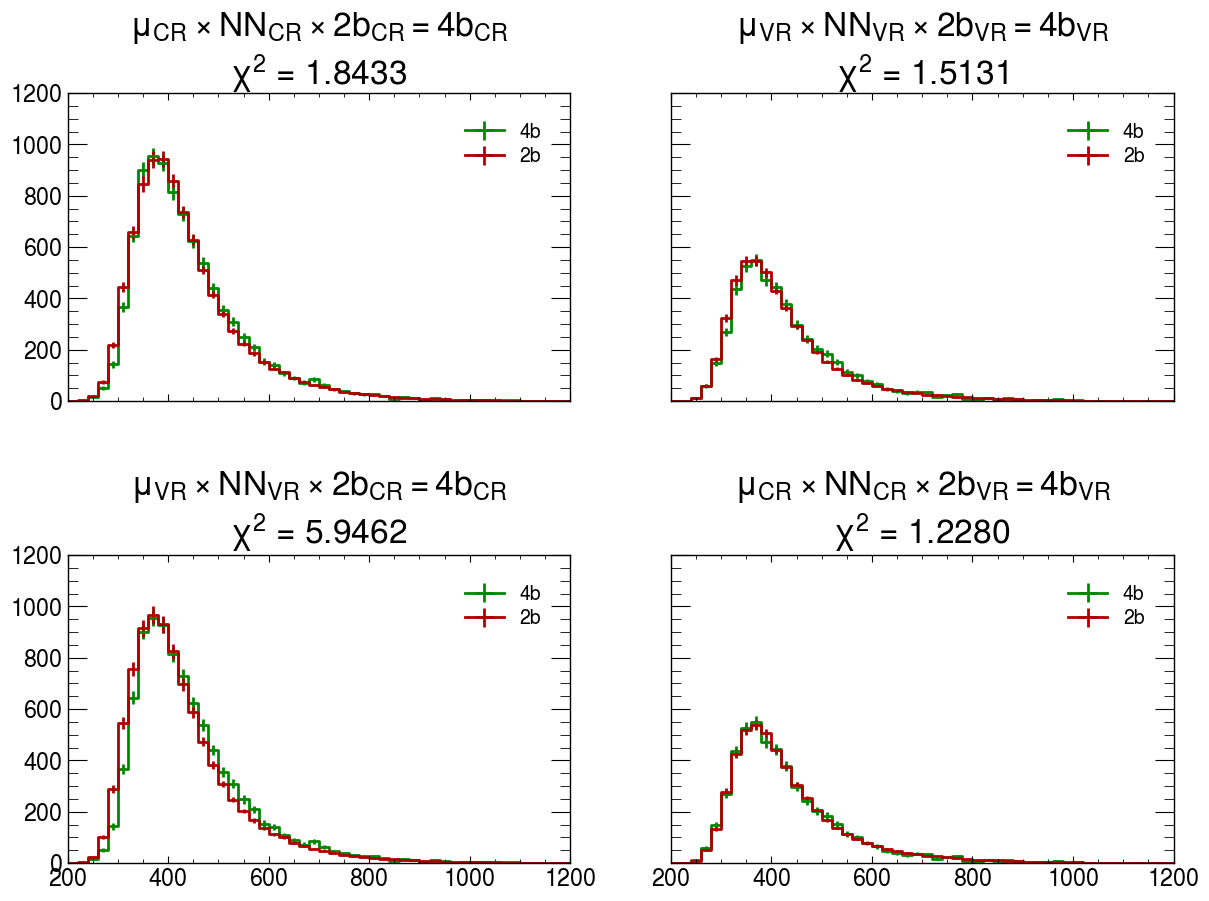

In [268]:
krs = [2, 1, 2, 1]
weights = [w_col(16), w_col(16, vr=True), w_col(16, vr=True), w_col(16)]
w_iqrs = [w_iqr(16), w_iqr(16, vr=True), w_iqr(16, vr=True), w_iqr(16)]
mu_iqrs = [
    get_mu_iqr(fdb16),
    get_mu_iqr(fdb16, vr=True),
    get_mu_iqr(fdb16, vr=True),
    get_mu_iqr(fdb16),
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]

fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.ravel()
i = 0
be = np.linspace(200, 1200, 51)
x2s = []
for kr, weight, iqr, mu_iqr in zip(krs, weights, w_iqrs, mu_iqrs):
    _results = {}
    _results = make_histograms(
        d16,
        kr=kr,
        feature="m_hh",
        bins=be,
        hrange=(200, 1200),
        weights_column=weight,
        W_IQR=iqr,
        mu_iqr=mu_iqr,
    )
#     _results = shape_systematic(
#         d16,
#         feature="m_hh",
#         kr=kr,
#         bins=be,
#         CR_weights=w_col(16),
#         VR_weights=w_col(16, vr=True),
#     )
    #_results = total_err_2b(_results)

    h_4b = _results["h_4b"]
    h_2b = _results["h_2b"]

    h_4b_err = _results["h_4b_err"]
    h_2b_err = _results["h_2b_err_stat"]

    #     print(h_4b)
    #     print(h_2b)
    hep.histplot(h_4b, be, yerr=h_4b_err, ax=ax[i], label="4b")
    hep.histplot(h_2b, be, yerr=h_2b_err, ax=ax[i], label="2b")
    X2_results = weighted_chisquare(h_2b, h_4b, h_2b_err, h_4b_err)
    #     print(X2_results[-1])
    ax[i].set_title(title[i] + "\n" + r"$\chi^2$ = {:.4f}".format(X2_results[-1]))
    ax[i].legend()
    x2s.append(X2_results[-1])

    i += 1


#     h_4b_err = _results["h_4b_err"]

#     _results = shape_systematic(
#         d16,
#         feature="m_hh",
#         kr=kr,
#         bins=be,
#         CR_weights=w_col(16),
#         VR_weights=w_col(16, vr=True),
#     )

#     _results = total_err_2b(_results)

#     h_2b_tot_err = _results["h_2b_tot_err"]

#     X2_results = weighted_chisquare(
#         _results["h_2b"],
#         _results["h_4b"],
#         _results["h_2b_tot_err"],
#         _results["h_4b_err"],
#     )
#     _ = ax[i].hist(
#         be[:-1],
#         bins=be,
#         weights=_results["h_4b"],
#         label=f"4b",
#         histtype="step",
#     )
#     _ = ax[i].hist(
#         be[:-1],
#         bins=be,
#         weights=_results["h_2b"],
#         label=f"2b",
#         histtype="step",
#     )
#     ax[i].legend()
#     ax[i].set_title(title[i] + f" $\chi^2$ = {X2_results[-1]}")

#     i += 1

#     print(kr, weight, X2_results[-1], np.mean(h_2b), np.std(h_2b))
#     print(_results)
#     print('------------------------------------------------------------')
#     # print(h_2b)
# plt.subplots_adjust(wspace=0)
# ax[2].set_xlabel(r"$m_{HH}$ [GeV]", fontsize=16)
# ax[3].set_xlabel(r"$m_{HH}$ [GeV]", fontsize=16)
# ax[0].set_ylabel('arb. units', fontsize = 16)
# ax[2].set_ylabel('arb. units', fontsize = 16)
# plt.savefig('plots/chi2_metric_testing.pdf', dpi = 600,bbox_inches='tight')
plt.subplots_adjust(hspace=0.5)

In [345]:
distance.euclidean([1.8433, 1.5131, 5.9462, 1.2280], [1, 1, 1, 1])

5.048891456547665

# Looping through different features

chi_matrix = (
               2016: (chi_1, chi_2, chi_3, chi_4),
              )
               




pseudo code:

chi2s = []
for each kr and model

    histograms = []
    for each feature:
        histogram 4b and 2b
        store histograms
        
    calculate chi2 
    store chi2

        
    
    

In [302]:
help(make_histograms)

Help on function make_histograms in module __main__:

make_histograms(df:pandas.core.frame.DataFrame, kr:int=2, feature:str='m_hh', bins=50, hrange=(200, 1200), weights_column:str=None, W_IQR:str=None, mu_iqr=None)



In [303]:
help(weighted_chisquare)

Help on function weighted_chisquare in module __main__:

weighted_chisquare(f_obs, f_exp, f_obs_err, f_exp_err, ignore_stats=False, residuals=False, stat_lim=10)



In [308]:
A = np.ones([4,50])

In [310]:
A.reshape(4*50)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [311]:
A.shape

(4, 50)

In [316]:
np.zeros(4)

array([0., 0., 0., 0.])

In [460]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(16), w_col(16, vr=True), w_col(16, vr=True), w_col(16)]
w_iqrs = [w_iqr(16), w_iqr(16, vr=True), w_iqr(16, vr=True), w_iqr(16)]
mu_iqrs = [
    get_mu_iqr(fdb16),
    get_mu_iqr(fdb16, vr=True),
    get_mu_iqr(fdb16, vr=True),
    get_mu_iqr(fdb16),
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)

for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    
    errors_2b_bs = np.zeros([len(features), nbins])
    errors_2b_poi = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))
    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d16,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )

        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd
        
        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']
        errors_2b_bs[i, :] = _results['h_2b_bs_err']
        errors_2b_poi[i, :] = _results['h_2b_pois']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))
    errors_2b_bs = errors_2b_bs.reshape(nbins*len(features))
    errors_2b_poi = errors_2b_poi.reshape(nbins*len(features))


    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
    
print(chi2_krs)
print(mean_emds)
    
    
    


[1.60461877 1.66873528 2.97027581 1.74210814]
[ 9.80764886  5.8747793  10.98247626  6.43493987]


In [318]:
distance.euclidean(chi2_krs, ones)

2.2903017243931063

In [461]:
distance.euclidean(mean_emds, np.zeros(4))

17.109244398891402

In [352]:
base16_error = 100 * errors_2b[0:50]/histograms_2b[0:50]

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [370]:
base16_bs_err = 100 * errors_2b_bs[0:50] / histograms_2b[:50]

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [371]:
base16_poi_err = 100 * errors_2b_poi[0:50] / histograms_2b[:50]

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


# Baseline - 2017

In [458]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(17), w_col(17, vr=True), w_col(17, vr=True), w_col(17)]
w_iqrs = [w_iqr(17), w_iqr(17, vr=True), w_iqr(17, vr=True), w_iqr(17)]
mu_iqrs = [
    get_mu_iqr(fdb17, 17),
    get_mu_iqr(fdb17, 17,vr=True),
    get_mu_iqr(fdb17, 17, vr=True),
    get_mu_iqr(fdb17, 17),
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)


for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))

    
    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d17,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )
        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd


        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))


    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
print(chi2_krs)
print(mean_emds)
    
    


/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


[1.08789178 1.3058583  2.26682049 1.14387748]
[ 9.75459134  6.03092811 14.20901068  6.08039515]


In [336]:
distance.euclidean(chi2_krs, ones)

1.314081105795221

In [459]:
distance.euclidean(mean_emds, np.zeros(4))

19.245553663135617

# Baseline - 2018

In [456]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(18), w_col(18, vr=True), w_col(18, vr=True), w_col(18)]
w_iqrs = [w_iqr(18), w_iqr(18, vr=True), w_iqr(18, vr=True), w_iqr(18)]
mu_iqrs = [
    get_mu_iqr(fdb18, 18),
    get_mu_iqr(fdb18, 18,vr=True),
    get_mu_iqr(fdb18, 18, vr=True),
    get_mu_iqr(fdb18, 18),
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)

for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))


    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d18,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )


        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd
        
        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))
    

    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
print(chi2_krs)
    
    
    


[1.11925757 1.29041951 2.54787574 0.98390784]


In [447]:
print(mean_emds)

[14.20810575 10.2975888  18.82627467  9.49159248]


In [340]:
distance.euclidean(chi2_krs, ones )

1.579475902292417

In [457]:
distance.euclidean(mean_emds, np.zeros(4))

27.43044932690967

# Example but with XGBoost

In [319]:
storage = "/mnt/storage/lborgna/NNT/MDR_VEC/data/xgboost/"

In [320]:
fp16 = storage + 'data_MDR_VEC_16_with_weights.root'
fp17 = storage + 'data_MDR_VEC_17_with_weights.root'
fp18 = storage + 'data_MDR_VEC_18_with_weights.root'

In [321]:
fd16 = uproot.open(fp16)
fd17 = uproot.open(fp17)
fd18 = uproot.open(fp18)

In [322]:
d16_xgb = load_nnt(fp16)
d17_xgb = load_nnt(fp17)
d18_xgb = load_nnt(fp18)

# XGBOOST - 2016

In [454]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(16), w_col(16, vr=True), w_col(16, vr=True), w_col(16)]
w_iqrs = [w_iqr(16), w_iqr(16, vr=True), w_iqr(16, vr=True), w_iqr(16)]
mu_iqrs = [
    get_mu_iqr(fd16),
    get_mu_iqr(fd16, vr=True),
    get_mu_iqr(fd16, vr=True),
    get_mu_iqr(fd16),
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)

for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    errors_2b_bs = np.zeros([len(features), nbins])
    errors_2b_poi = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))


    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d16_xgb,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )

        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd

        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']
        errors_2b_bs[i, :] = _results['h_2b_bs_err']
        errors_2b_poi[i, :] = _results['h_2b_pois']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))
    errors_2b_bs = errors_2b_bs.reshape(nbins*len(features))
    errors_2b_poi = errors_2b_poi.reshape(nbins*len(features))

    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
print(chi2_krs)
print(mean_emds)
    
    


[1.98492758 1.14969176 3.44455571 1.79003871]
[7.24102765 4.17087645 6.98597547 5.33047323]


In [334]:
distance.euclidean(chi2_krs, ones)

2.755449825537312

In [455]:
distance.euclidean(mean_emds, np.zeros(4))

12.126272717047494

In [354]:
xgb16_error = 100 * (errors_2b[:50]/histograms_2b[:50]) 

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [373]:
xgb16_bs_err = 100 * errors_2b_bs[0:50] / histograms_2b[:50]
xgb16_poi_err = 100 * errors_2b_poi[0:50] / histograms_2b[:50]

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


# XGBOOST - 2017

In [452]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(17), w_col(17, vr=True), w_col(17, vr=True), w_col(17)]
w_iqrs = [w_iqr(17), w_iqr(17, vr=True), w_iqr(17, vr=True), w_iqr(17)]
mu_iqrs = [
    get_mu_iqr(fd17, 17),
    get_mu_iqr(fd17, 17, vr=True),
    get_mu_iqr(fd17, 17, vr=True),
    get_mu_iqr(fd17, 17)
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)


for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))


    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d17_xgb,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )

        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd

        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))


    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
print(chi2_krs)
print(mean_emds)
    
    
    


[1.89753497 1.08050484 3.12985487 1.39361814]
[ 9.5650904   5.00705134 13.09492363  5.25845784]


In [342]:
distance.euclidean(chi2_krs, ones)

2.3459043121158505

In [453]:
distance.euclidean(mean_emds, np.zeros(4))

17.76766504969938

# XGBOOST - 2018

In [450]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dEta_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (0, 1.5)]
hists = ['h_4b', 'h_2b', 'h_4b_err', 'h_2b_err_stat']
nbins = 50
krs = [2, 1, 2, 1]
weights = [w_col(18), w_col(18, vr=True), w_col(18, vr=True), w_col(18)]
w_iqrs = [w_iqr(18), w_iqr(18, vr=True), w_iqr(18, vr=True), w_iqr(18)]
mu_iqrs = [
    get_mu_iqr(fd18, 18),
    get_mu_iqr(fd18, 18, vr=True),
    get_mu_iqr(fd18, 18, vr=True),
    get_mu_iqr(fd18, 18)
]

title = [
    r"$\mu_{CR} \times NN_{CR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{VR} = 4b_{VR}$",
    r"$\mu_{VR} \times NN_{VR} \times 2b_{CR} = 4b_{CR}$",
    r"$\mu_{CR} \times NN_{CR} \times 2b_{VR} = 4b_{VR}$",
]


chi2_krs = np.zeros(4)
mean_emds = np.zeros(4)


for j, _ in enumerate(krs):
    
    histograms_2b = np.zeros([len(features), nbins])
    errors_2b = np.zeros([len(features), nbins])
    histograms_4b = np.zeros([len(features), nbins])
    errors_4b = np.zeros([len(features), nbins])
    emds = np.zeros(len(features))


    for i, feature in enumerate(features):
        hrange = ranges[i]
        be = np.linspace(hrange[0], hrange[1], nbins+1)

        _results = make_histograms(
            d18_xgb,
            kr=krs[j],
            feature=feature,
            bins=be,
            weights_column=weights[j],
            W_IQR=w_iqrs[j],
            mu_iqr=mu_iqrs[j],
        )
        
        emd = wasserstein_distance(_results['h_4b'], _results['h_2b'])
        emds[i] = emd

        histograms_4b[i, :] = _results['h_4b']
        histograms_2b[i, :] = _results['h_2b']
        errors_4b[i, :] = _results['h_4b_err']
        errors_2b[i, :] = _results['h_2b_err_stat']

    histograms_4b = histograms_4b.reshape(nbins*len(features))
    histograms_2b = histograms_2b.reshape(nbins*len(features))
    errors_4b = errors_4b.reshape(nbins*len(features))
    errors_2b = errors_2b.reshape(nbins*len(features))


    x2 = weighted_chisquare(histograms_2b, histograms_4b, errors_2b, errors_4b)
    chi2_krs[j] = x2[-1]
    mean_emd = np.mean(emds)
    mean_emds[j] = mean_emd
    
print(chi2_krs)
print(mean_emds)
    
    
    


[2.82779694 1.04379024 4.7847986  1.24566579]
[13.23793541  7.97183438 18.2433237   7.64780047]


In [344]:
distance.euclidean(chi2_krs, ones)

4.210440754931021

In [451]:
distance.euclidean(mean_emds, np.zeros(4))

25.101808478448365

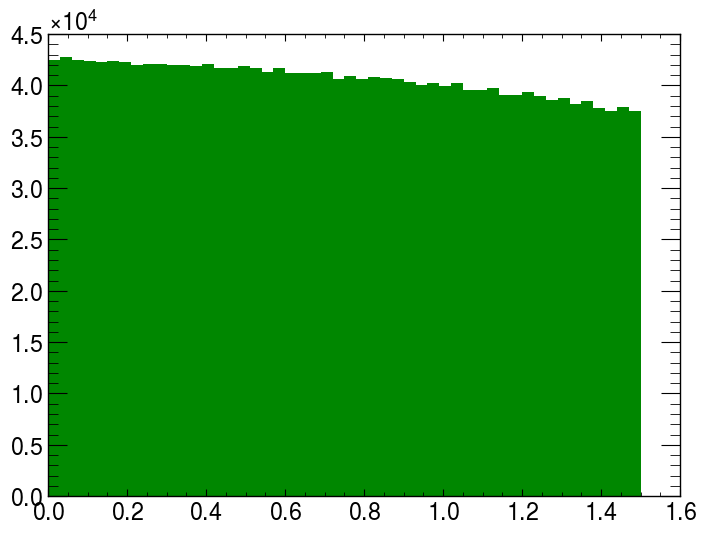

In [295]:
_ = plt.hist(d16[features[3]].values, bins = 50)

In [274]:
d16[features].describe([0.01, 0.25, 0.5, 0.75, 0.99])

m_hh      X_wt_tag         pt_hh       dEta_hh
count  2.031630e+06  2.031630e+06  2.031630e+06  2.031630e+06
mean   4.240317e+02  3.627703e+00  5.064199e+01  7.344521e-01
std    1.142178e+02  1.397048e+00  3.721462e+01  4.313373e-01
min    1.973148e+02  1.500001e+00  2.256876e-02  5.114301e-07
1%     2.785901e+02  1.542725e+00  4.361034e+00  1.426220e-02
25%    3.492960e+02  2.493529e+00  2.505113e+01  3.604053e-01
50%    3.953358e+02  3.442662e+00  4.211243e+01  7.270291e-01
75%    4.643885e+02  4.568215e+00  6.626672e+01  1.104734e+00
99%    8.484627e+02  7.240690e+00  1.807881e+02  1.483715e+00
max    2.123658e+03  9.623448e+00  9.100005e+02  1.500000e+00

array([[<AxesSubplot:title={'center':'m_hh'}>,
        <AxesSubplot:title={'center':'X_wt_tag'}>],
       [<AxesSubplot:title={'center':'pt_hh'}>,
        <AxesSubplot:title={'center':'dEta_hh'}>]], dtype=object)

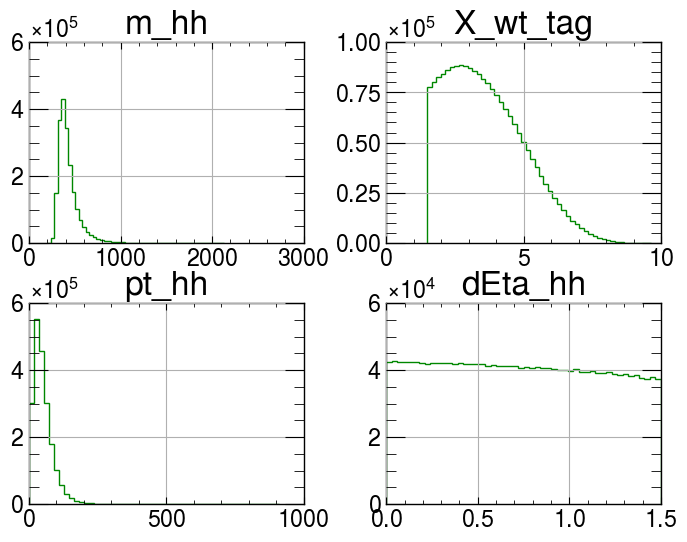

In [277]:
d16[features].hist(histtype='step', bins = 50)

### Comparing 2b stat errors

In [355]:
from eda_tools.histogram_helper import bin_midpoint

In [361]:
x = bin_midpoint(np.linspace(200, 1200, 51))

(0.0, 70.0)

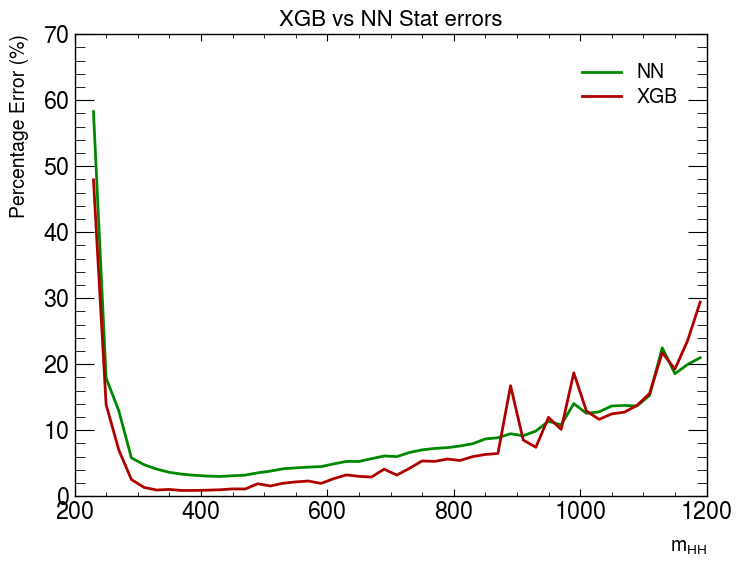

In [368]:
plt.plot(x, base16_error, label = 'NN')
plt.plot(x, xgb16_error, label = 'XGB')
plt.xlabel('$m_{HH}$', fontsize = 14)
plt.ylabel('Percentage Error (%)', fontsize = 14)
plt.title('XGB vs NN Stat errors', fontsize = 16)
plt.legend()
plt.ylim(0, 70)

(-2.0, 10.0)

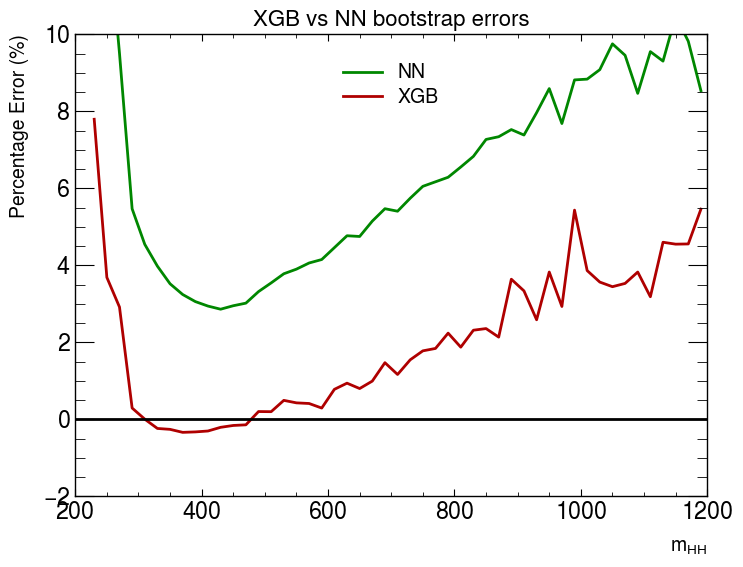

In [386]:
plt.plot(x, base16_bs_err, label = 'NN')
plt.plot(x, xgb16_bs_err, label = 'XGB')
plt.axhline(0, color = 'black')
plt.xlabel('$m_{HH}$', fontsize = 14)
plt.ylabel('Percentage Error (%)', fontsize = 14)
plt.title('XGB vs NN bootstrap errors', fontsize = 16)
plt.legend()
plt.ylim(-2, 10)

In [384]:
xgb16_bs_err

array([            nan,  7.79188481e+00,  3.68465354e+00,  2.91431586e+00,
        2.91390799e-01,  2.17787790e-03, -2.39039812e-01, -2.62433311e-01,
       -3.40416749e-01, -3.28633992e-01, -3.05324975e-01, -2.09725215e-01,
       -1.61537139e-01, -1.44791597e-01,  2.00056984e-01,  1.96680904e-01,
        4.90565766e-01,  4.25596920e-01,  4.09265187e-01,  2.90633485e-01,
        7.76808975e-01,  9.37130491e-01,  7.97450962e-01,  9.90796996e-01,
        1.46909847e+00,  1.16283888e+00,  1.54386126e+00,  1.77670677e+00,
        1.83911519e+00,  2.23655526e+00,  1.87274415e+00,  2.31270770e+00,
        2.35536002e+00,  2.13332174e+00,  3.63717830e+00,  3.33400281e+00,
        2.58380768e+00,  3.82349611e+00,  2.92909320e+00,  5.43180358e+00,
        3.86147665e+00,  3.56291089e+00,  3.44299083e+00,  3.52823130e+00,
        3.82339954e+00,  3.18136551e+00,  4.59756563e+00,  4.54792846e+00,
        4.55349662e+00,  5.45748857e+00])

(0.0, 10.0)

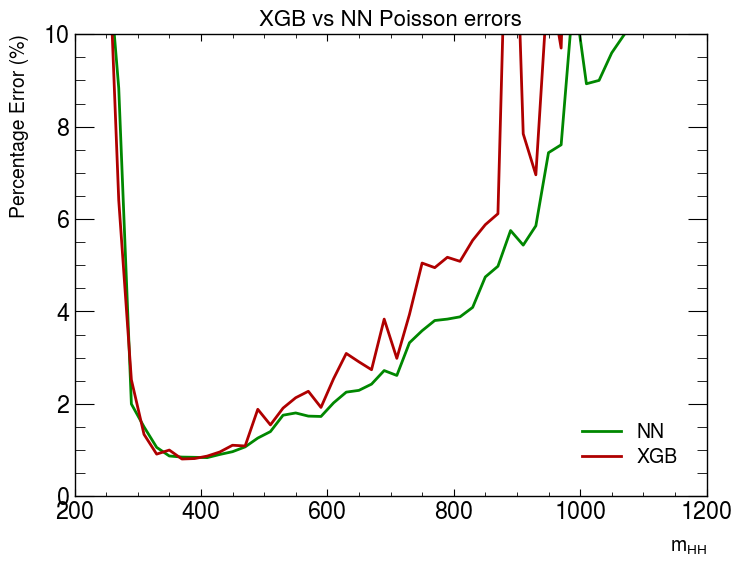

In [380]:
plt.plot(x, base16_poi_err, label = 'NN')
plt.plot(x, xgb16_poi_err, label = 'XGB')
plt.xlabel('$m_{HH}$', fontsize = 14)
plt.ylabel('Percentage Error (%)', fontsize = 14)
plt.title('XGB vs NN Poisson errors', fontsize = 16)
plt.legend()
plt.ylim(0, 10)

In [266]:
x2s

[1.4232415396491516,
 1.4232415396491516,
 1.4232415396491516,
 1.4232415396491516]

In [259]:
ones = np.ones(len(x2s))

In [260]:
ones

array([1., 1., 1., 1.])

In [261]:
from scipy.spatial import distance

In [262]:
distance.euclidean(x2s, ones)

0.415996533521327

In [82]:
results

{'h_4b': array([  1,   1,  16,  52, 143, 368, 644, 902, 955, 929, 814, 728, 622,
        538, 441, 355, 310, 248, 210, 154, 141, 108,  90,  72,  85,  63,
         46,  39,  31,  26,  27,  19,   8,  16,  13,   6,  11,   9,   2,
          6,   5,   4,   2,   4,   3,   0,   1,   1,   1,   0]),
 'h_4b_err': array([ 1.        ,  1.        ,  4.        ,  7.21110255, 11.95826074,
        19.18332609, 25.37715508, 30.03331484, 30.90307428, 30.47950131,
        28.53068524, 26.98147513, 24.93992783, 23.19482701, 21.        ,
        18.84144368, 17.60681686, 15.74801575, 14.49137675, 12.40967365,
        11.87434209, 10.39230485,  9.48683298,  8.48528137,  9.21954446,
         7.93725393,  6.78232998,  6.244998  ,  5.56776436,  5.09901951,
         5.19615242,  4.35889894,  2.82842712,  4.        ,  3.60555128,
         2.44948974,  3.31662479,  3.        ,  1.41421356,  2.44948974,
         2.23606798,  2.        ,  1.41421356,  2.        ,  1.73205081,
         0.        ,  1.        ,  1.  

In [69]:
100 * results['h_2b_err_stat'] / results['h_2b']

array([50.63128924, 17.91136324, 13.32880724,  4.44601769,  1.9519324 ,
        1.17017644,  0.78777546,  0.69955039,  0.6350446 ,  0.59184   ,
        0.68701623,  0.63384494,  0.70577298,  0.74871068,  0.82429816,
        0.94399965,  1.03635372,  1.08897625,  1.28266035,  1.27670922,
        1.3372783 ,  2.09772206,  1.68803656,  2.17263208,  1.98343221,
        2.25342041,  2.5544441 ,  2.66956881,  2.88102346,  2.83697861,
        3.22334587,  3.55625962,  4.18687973,  4.1657589 ,  5.38221734,
        4.49363243,  6.70084609,  5.30100488,  6.08397528,  6.81506781,
        6.66365123,  7.72066472,  9.05246279,  9.87590862, 10.7499404 ,
       13.40274911, 13.09357763, 10.75837382, 11.9295737 , 13.67014033])

In [70]:
100 * results['h_4b_err'] / results['h_4b']

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([100.        , 100.        ,  25.        ,  13.86750491,
         8.3624201 ,   5.21286035,   3.94055203,   3.32963579,
         3.23592401,   3.28089357,   3.50499819,   3.70624658,
         4.0096347 ,   4.31130614,   4.76190476,   5.30744892,
         5.67961834,   6.35000635,   6.90065559,   8.05822964,
         8.42151921,   9.62250449,  10.54092553,  11.78511302,
        10.84652289,  12.59881577,  14.74419562,  16.01281538,
        17.9605302 ,  19.61161351,  19.24500897,  22.94157339,
        35.35533906,  25.        ,  27.73500981,  40.82482905,
        30.15113446,  33.33333333,  70.71067812,  40.82482905,
        44.72135955,  50.        ,  70.71067812,  50.        ,
        57.73502692,          nan, 100.        , 100.        ,
       100.        ,          nan])

In [45]:
h_4b, h_2b, be = histograms_4b(d16)

In [22]:
h_4b, h_2b, be

(array([  1,   1,  16,  52, 143, 368, 644, 902, 955, 929, 814, 728, 622,
        538, 441, 355, 310, 248, 210, 154, 141, 108,  90,  72,  85,  63,
         46,  39,  31,  26,  27,  19,   8,  16,  13,   6,  11,   9,   2,
          6,   5,   4,   2,   4,   3,   0,   1,   1,   1,   0]),
 array([1.45620148e-01, 3.57164751e+00, 1.96063205e+01, 7.50657262e+01,
        2.18681507e+02, 4.43060212e+02, 6.57701176e+02, 8.47172453e+02,
        9.41194730e+02, 9.42525188e+02, 8.59424417e+02, 7.37088165e+02,
        6.29527297e+02, 5.11430647e+02, 4.15353340e+02, 3.39363503e+02,
        2.73318957e+02, 2.24515259e+02, 1.85776602e+02, 1.51513917e+02,
        1.26132147e+02, 1.11584848e+02, 8.99724845e+01, 7.59045018e+01,
        6.32499752e+01, 5.40985373e+01, 4.53647698e+01, 3.75370071e+01,
        3.12213308e+01, 2.62004600e+01, 2.23652059e+01, 1.93752204e+01,
        1.64044008e+01, 1.34336852e+01, 1.16519298e+01, 8.89754060e+00,
        9.16902059e+00, 6.66528454e+00, 5.48971587e+00, 4.41463698e+

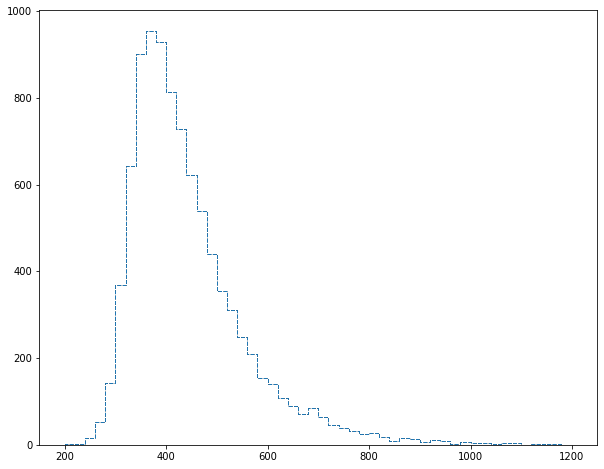

In [35]:
f, ax = plt.subplots(figsize=(10,8))
_,_,_ = ax.hist(be[:-1], bins =be,weights=h_4b, histtype='step',ls='--', color='black')
h_t,_,_ = ax.hist(d16.loc[(d16['ntag']>=4)&(d16['kinematic_region']==2), 'm_hh'].values, bins =50, range=(200,1200),ls='--', histtype='step')

In [37]:
h_t

array([  1.,   1.,  16.,  52., 143., 368., 644., 902., 955., 929., 814.,
       728., 622., 538., 441., 355., 310., 248., 210., 154., 141., 108.,
        90.,  72.,  85.,  63.,  46.,  39.,  31.,  26.,  27.,  19.,   8.,
        16.,  13.,   6.,  11.,   9.,   2.,   6.,   5.,   4.,   2.,   4.,
         3.,   0.,   1.,   1.,   1.,   0.])

In [39]:
h_4b==h_t

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# DEBUG

# Exploration with mpl-hep

In [172]:
import mplhep as hep


In [173]:
hep.set_style("ATLAS") # string aliases work too

In [181]:
help(hep.histplot)

Help on function histplot in module mplhep.plot:

histplot(H, bins=None, *, yerr:'ArrayLike | bool | None'=None, w2=None, w2method=None, stack=False, density=False, binwnorm=None, histtype='step', label=None, edges=True, binticks=False, ax=None, **kwargs)
    Create a 1D histogram plot from `np.histogram`-like inputs.
    Parameters
    ----------
        H : object
            Histogram object with containing values and optionally bins. Can be:
    
            - `np.histogram` tuple
            - PlottableProtocol histogram object
            - `boost_histogram` classic (<0.13) histogram object
            - raw histogram values, provided `bins` is specified.
    
        bins : iterable, optional
            Histogram bins, if not part of ``h``.
        yerr : iterable or bool, optional
            Histogram uncertainties. Following modes are supported:
            - True, sqrt(N) errors or poissonian interval when ``w2`` is specified
            - shape(N) array of for one sided er

In [184]:
h_4b_cr, be = np.histogram(
    d16.loc[(d16["ntag"] >= 4) & (d16["kinematic_region"] == 2), "m_hh"],
    bins=50,
    range=(200, 1200),
)

In [185]:
h_4b_vr, _ = np.histogram(
    d16.loc[(d16["ntag"] >= 4) & (d16["kinematic_region"] == 1), "m_hh"],
    bins=be,
    range=(200, 1200),
)

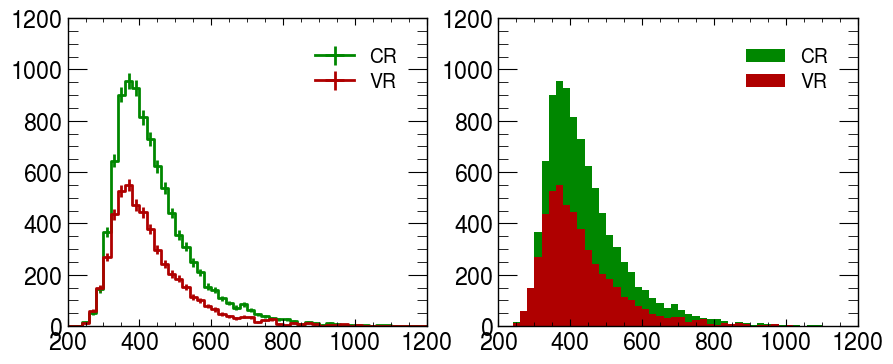

In [192]:
f, ax = plt.subplots(1,2, figsize=(10,4))
hep.histplot(h_4b_cr, be, yerr = True, ax = ax[0], label = 'CR')
hep.histplot(h_4b_vr, be, yerr=True, ax=ax[0], label = 'VR')
_ = ax[1].hist(be[:-1], bins=be, weights=h_4b_cr, label = 'CR')
_ = ax[1].hist(be[:-1], bins=be, weights=h_4b_vr, label = 'VR')
ax[0].legend()
ax[1].legend()


<AxesSubplot:>

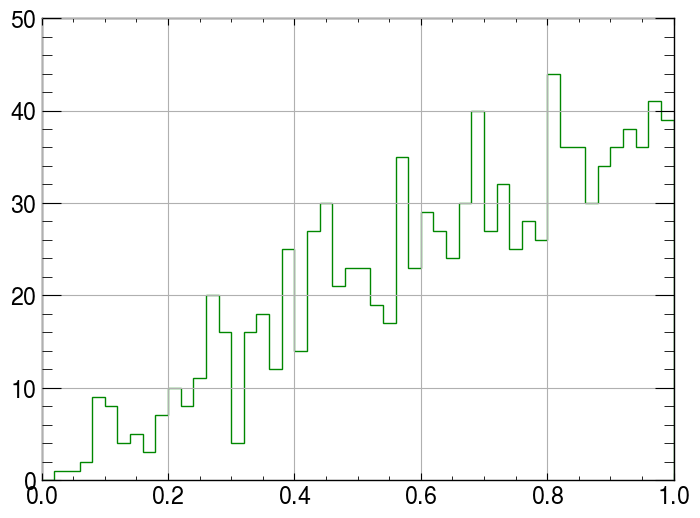

In [296]:
d16['pt_hh'].hist(histtype='step', bins = 50, range = (0, 1))

<AxesSubplot:>

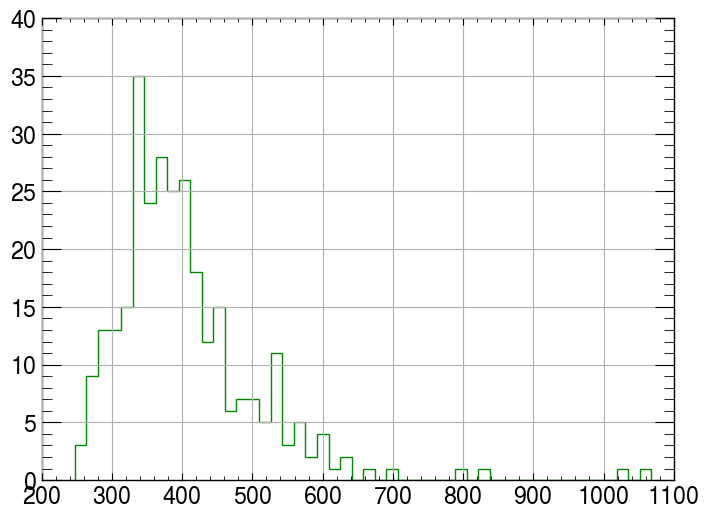

In [299]:
d16.loc[d16['pt_hh'] < 0.5, 'm_hh'].hist(histtype='step', bins =50)

# DEBUGGING - WASSERSTEIN DISTANCE

In [432]:
help(make_histograms)

Help on function make_histograms in module __main__:

make_histograms(df:pandas.core.frame.DataFrame, kr:int=2, feature:str='m_hh', bins=50, hrange=(200, 1200), weights_column:str=None, W_IQR:str=None, mu_iqr=None)



In [438]:
test = make_histograms(
    d16,
    kr=2,
    feature="m_hh",
    bins=50,
    hrange=(200, 1200),
    weights_column=w_col(16),
    W_IQR=w_iqr(16),
    mu_iqr=get_mu_iqr(fdb16, 16),
)

In [440]:
h_4b = test['h_4b']
h_2b = test['h_2b']

In [441]:
from scipy.stats import wasserstein_distance

In [442]:
wasserstein_distance(h_4b, h_2b)

7.71998574288158

In [443]:
wasserstein_distance(h_2b, h_4b)

7.71998574288158

# DEBUGGING - Bootstrap Error

In [ ]:
def bs_error(df, kr, be, W_med, W_IQR, mu_med, mu_IQR, feature='m_hh_cor', hrange = (200, 1600)):

    mask = (df.ntag == 2) & (df.kinematic_region == kr)
    df2b = df.loc[mask]
    
    w1 = mu_med * df2b[W_med]
    h1, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = w1)

    w2 = w1 + 0.5 * df2b[W_IQR]
    h2, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = w2)

    w3 = w2 * (sum(h1)/ sum(h2))
    h3, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = w3)

    w4 = w1 * 0.5 * mu_IQR
    h4, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = w4)
    
    w5 = w4 + w3
    h5, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = w5)

    err_mag = w5 - w1

    h_err_bs_mag, _ = np.histogram(df2b[feature], bins = be, range = hrange, weights = err_mag)

    results = {}

    results['err_mag'] = err_mag
    results['h_err_bs_mag'] = h_err_bs_mag

    return results


### NN vs XGB - CR 

In [390]:
from hh4b_utils.nnt_tools import get_mu

In [395]:
be = np.linspace(200, 1200, 51)

In [387]:
mask = (d16.ntag == 2) & (d16.kinematic_region == 2)

In [399]:
mask_xgb = (d16_xgb.ntag == 2) & (d16_xgb.kinematic_region ==2)

In [389]:
df_nn = d16[mask].copy()

In [400]:
df_xgb = d16_xgb[mask_xgb].copy()

In [392]:
mu_med_nn = get_mu(fdb16, 16)

In [401]:
mu_med_xgb = get_mu(fd16, 16)

In [393]:
w_nn = df_nn[w_col(16)]

In [402]:
w_xgb = df_xgb[w_col(16)]

In [394]:
w1 = mu_med_nn * w_nn

In [403]:
w1_xgb = mu_med_xgb * w_xgb

In [408]:
h1, _, _ = plt.hist(df_nn['m_hh'].values, bins = be, weights= w1.values, histtype='step', label = 'NN')
h1_xgb, _, _ = plt.hist(df_xgb['m_hh'].values, bins = be, weights=w1_xgb.values, histtype='step', label = 'XGB')
plt.legend()
plt.xlabel('$m_{hh} [GeV]', fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
plt.title('step 1')

Text(0.5, 1.0, 'step 1')

In [409]:
w2 = w1 + 0.5 * df_nn[w_iqr(16)]
w2_xgb = w1_xgb + 0.5 * df_xgb[w_iqr(16)]

h2, _, _ = plt.hist(df_nn['m_hh'].values, bins = be, weights= w2.values, histtype='step', label = 'NN')
h2_xgb, _, _ = plt.hist(df_xgb['m_hh'].values, bins = be, weights=w2_xgb.values, histtype='step', label = 'XGB')
plt.legend()
plt.xlabel('$m_{hh} [GeV]', fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
plt.title('step 2')

Text(0.5, 1.0, 'step 2')

In [410]:
w3 = w2 * (sum(h1)/ sum(h2))
w3_xgb = w2_xgb * (sum(h1_xgb)/sum(h2_xgb))

In [419]:
h3, _, _ = plt.hist(df_nn['m_hh'].values, bins = be, weights = w3.values, histtype='step', label = 'NN')
h3_xgb,_, _ = plt.hist(df_xgb['m_hh'].values, bins = be, weights=w3_xgb.values, histtype='step', label = 'XGB')
plt.legend()
plt.xlabel('m_hh [GeV]', fontsize =14)
plt.ylabel('arb.units')
plt.title('step 3')

Text(0.5, 1.0, 'step 3')

In [414]:
mu_iqr_nn = get_mu_iqr(fdb16, 16)
print(mu_iqr_nn)
mu_iqr_xgb = get_mu_iqr(fd16, 16)
print(mu_iqr_xgb)

0.07445350070911216
0.0013814190607830401


In [415]:
w4 = w1 * 0.5 * mu_iqr_nn
w4_xgb = w1_xgb * 0.5 * mu_iqr_xgb
h4,_,_ = plt.hist(df_nn['m_hh'].values, bins =be, weights=w4.values, histtype='step', label = 'NN')
h4_xgb, _, _ = plt.hist(df_xgb['m_hh'].values, bins=be, weights=w4_xgb.values, histtype='step', label='XGB')
plt.legend()
plt.xlabel('$m_{hh} [GeV]', fontsize=14)
plt.ylabel('arb.units', fontsize=14)
plt.title('step 4', fontsize =14)


Text(0.5, 1.0, 'step 4')

Text(0.5, 1.0, 'step 5')

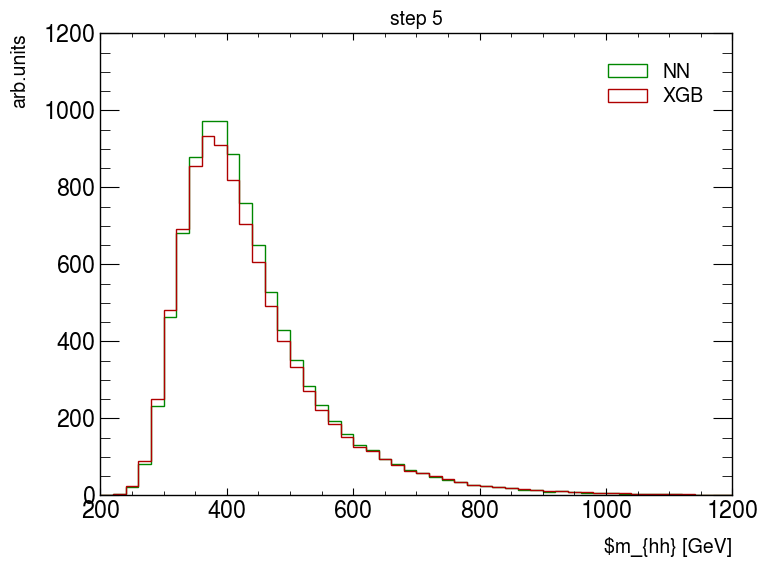

In [417]:
w5 = w4 + w3
w5_xgb = w4_xgb + w3_xgb

h5,_,_ = plt.hist(df_nn['m_hh'].values, bins =be, weights=w5.values, histtype='step', label = 'NN')
h5_xgb, _, _ = plt.hist(df_xgb['m_hh'].values, bins=be, weights=w5_xgb.values, histtype='step', label='XGB')
plt.legend()
plt.xlabel('$m_{hh} [GeV]', fontsize=14)
plt.ylabel('arb.units', fontsize=14)
plt.title('step 5', fontsize =14)


Text(0.5, 1.0, 'step 6')

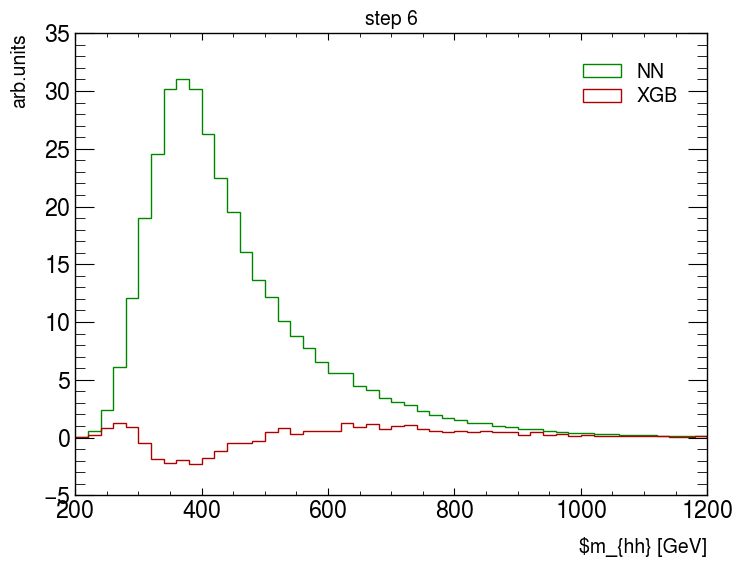

In [422]:
err_mag = w5 - w1
err_mag_xgb = w5_xgb - w1_xgb

h6,_,_ = plt.hist(df_nn['m_hh'].values, bins =be, weights=err_mag.values, histtype='step', label = 'NN')
h6_xgb, _, _ = plt.hist(df_xgb['m_hh'].values, bins=be, weights=err_mag_xgb.values, histtype='step', label='XGB')
plt.legend()
plt.xlabel('$m_{hh} [GeV]', fontsize=14)
plt.ylabel('arb.units', fontsize=14)
plt.title('step 6', fontsize =14)

Text(0.5, 1.0, 'step 6 + ABS')

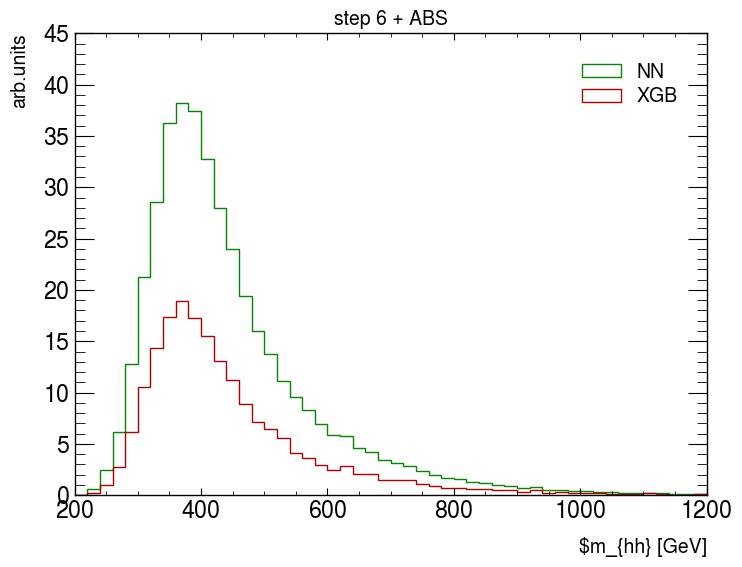

In [423]:
err_mag = np.abs(w5 - w1)
err_mag_xgb = np.abs(w5_xgb - w1_xgb)

h6_abs, _, _ = plt.hist(
    df_nn["m_hh"].values, bins=be, weights=err_mag.values, histtype="step", label="NN"
)
h6_xgb_abs, _, _ = plt.hist(
    df_xgb["m_hh"].values,
    bins=be,
    weights=err_mag_xgb.values,
    histtype="step",
    label="XGB",
)
plt.legend()
plt.xlabel("$m_{hh} [GeV]", fontsize=14)
plt.ylabel("arb.units", fontsize=14)
plt.title("step 6 + ABS", fontsize=14)

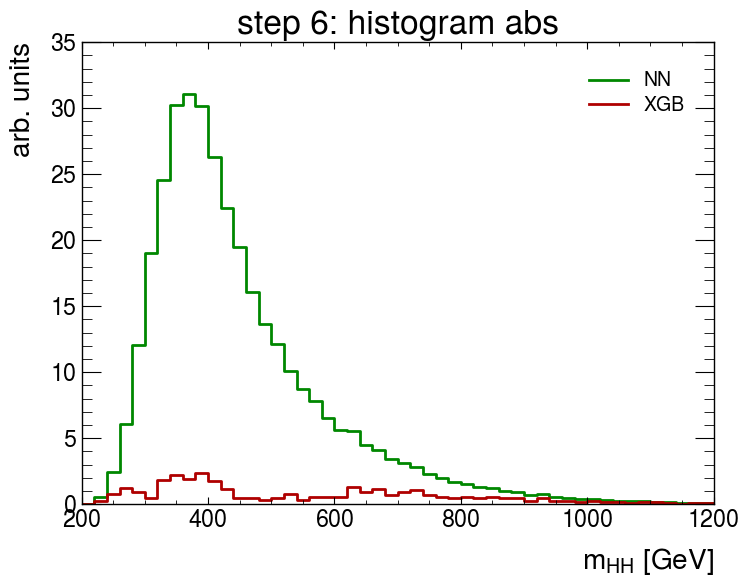

In [428]:
hep.histplot(np.abs(h6), be, label = 'NN')
hep.histplot(np.abs(h6_xgb), be, label = 'XGB')
plt.xlabel('$m_{HH}$ [GeV]')
plt.ylabel('arb. units')
plt.title('step 6: histogram abs')
plt.legend()

In [431]:
abs(xgb16_bs_err)

array([           nan, 7.79188481e+00, 3.68465354e+00, 2.91431586e+00,
       2.91390799e-01, 2.17787790e-03, 2.39039812e-01, 2.62433311e-01,
       3.40416749e-01, 3.28633992e-01, 3.05324975e-01, 2.09725215e-01,
       1.61537139e-01, 1.44791597e-01, 2.00056984e-01, 1.96680904e-01,
       4.90565766e-01, 4.25596920e-01, 4.09265187e-01, 2.90633485e-01,
       7.76808975e-01, 9.37130491e-01, 7.97450962e-01, 9.90796996e-01,
       1.46909847e+00, 1.16283888e+00, 1.54386126e+00, 1.77670677e+00,
       1.83911519e+00, 2.23655526e+00, 1.87274415e+00, 2.31270770e+00,
       2.35536002e+00, 2.13332174e+00, 3.63717830e+00, 3.33400281e+00,
       2.58380768e+00, 3.82349611e+00, 2.92909320e+00, 5.43180358e+00,
       3.86147665e+00, 3.56291089e+00, 3.44299083e+00, 3.52823130e+00,
       3.82339954e+00, 3.18136551e+00, 4.59756563e+00, 4.54792846e+00,
       4.55349662e+00, 5.45748857e+00])

### Weights comparison

In [1]:
print("hello")

hello


In [2]:
df_nn

NameError: name 'df_nn' is not defined